In [ ]:
import sys
sys.path.append(r'C:\Users\Nityananda\Documents\Python\eleicoes_ce_2022')

# 1. Sobre a coleta dos dados

Os dados das eleições no Brasil são disponibilizados na página Tribunal Superior Eleitoral (TSE).

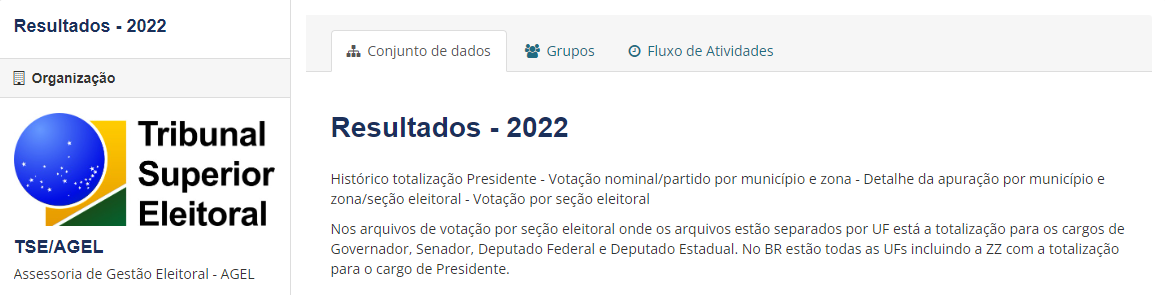

Os dados da eleição referentes ao cargo de presidente podem ser baixados:

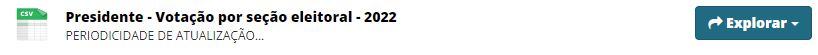

# 2. Rotina de *scaping*

In [1]:
import dataprocessing.datacolect as dc

## 2.1. Preparação para abertura do *browser*

In [2]:
url = 'https://dadosabertos.tse.jus.br/dataset/resultados-2022'

In [3]:
webdriver = dc.Webdriver(url)

In [4]:
browser = webdriver.set_driver(headless=True) # o parâmetro headless define se o navegador ficará visível
# quando definido como True, ele não será visível.
# directory é o parâmetro que define o diretório em que o arquivo baixado será destinado.

In [5]:
browser.get(url)

O navegador é aberto na página desejada, no caso, naquela que contém os dados para *scraping*.

## 2.2. Coleta dos dados da eleição para presidente

In [6]:
scrape = dc.Scrape(browser)

A célula abaixo faz com que a automação clique e direcione para a página que contém o conjunto de dados do estado de interesse.

In [7]:
presidente_page = scrape.get_element('//a[@title="Presidente - Votação por seção eleitoral - 2022"]')
presidente_page.click()

E o *link* para *download* do arquivo é obtido, como mostrado abaixo:

In [8]:
presidente_link_download = scrape.get_element(
    path='//a[@class="btn btn-primary resource-url-analytics resource-type-None"]'
).get_attribute('href')

In [9]:
print(presidente_link_download)

https://cdn.tse.jus.br/estatistica/sead/odsele/votacao_secao/votacao_secao_2022_BR.zip


# 3. Gerenciamento do *download* do conjunto de dados

A rotina deve ser encerrada assim que o arquivo for baixado e estiver no diretório de interesse. Após encerrada, o navegador da automação deve ser encerrado. Para isso:


In [10]:
import dataprocessing.downloadmanager as dm

A classe `Manager` é instanciada e os parâmetros `link` e `directory` são passados.

In [11]:
manager = dm.Manager(
    link=presidente_link_download, # link do arquivo que será baixado
    directory=r'C:\Users\Nityananda\Desktop\eleicoes_ceara' # diretório em que o arquivo será salvo
)

A célula abaixo executa o *download* do arquivo a partir do link obtido e instanciado na variável `presidente_link_download`:

In [12]:
file_name = manager.download()

E aguarda-se até o encerramento do *download* e a presença do arquivo no diretório para que o navegador seja fechado e a rotina finalizada:

In [13]:
manager.download_waits(file=file_name)

In [14]:
browser.quit()

O arquivo baixado está no formato *zip*, portanto, antes de prosseguir para a análise desse conjunto de dados é necessário a sua descompactação.

